<a href="https://colab.research.google.com/github/Consolucas/DesafiosAnaliseDados/blob/main/Desafios_Python_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [102]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [103]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)

#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `info`

In [104]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


In [105]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


In [106]:
dados.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos.de.Estudo', 'Renda', 'Altura'], dtype='object')

#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [107]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [108]:
dados['UF'].value_counts().reset_index()

,UF,count
0,São Paulo,8544
1,Minas Gerais,7686
2,Rio Grande do Sul,6322
3,Bahia,5717
4,Rio de Janeiro,5556
5,Pará,4449
6,Paraná,4356
7,Pernambuco,3820
8,Goiás,3478
9,Ceará,3359


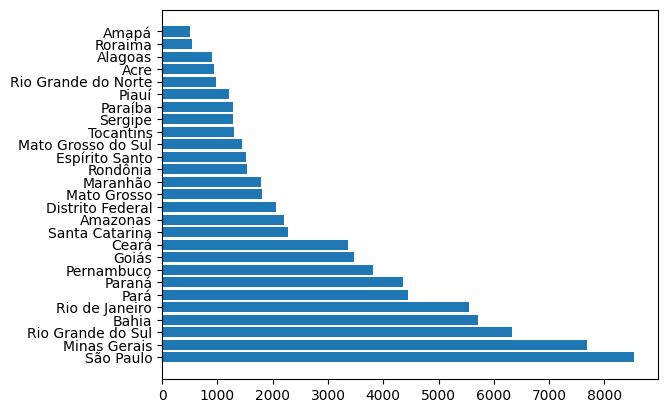

In [109]:
plt.barh(dados['UF'].value_counts().index, dados['UF'].value_counts())
plt.show()

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [110]:
# Definindo as variáveis
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

##### Sexo

In [111]:
sexo = {0: 'Masculino', 1: 'Feminino'}
dados['Sexo'] = dados['Sexo'].map(sexo).astype('category')

In [112]:
print(dados['Sexo'].dtype)

category


In [113]:
print(dados['Sexo'].unique())

['Masculino', 'Feminino']
Categories (2, object): ['Feminino', 'Masculino']


In [114]:
dados['Sexo']

,Sexo
0,Masculino
1,Feminino
2,Feminino
3,Masculino
4,Feminino
...,...
76835,Feminino
76836,Masculino
76837,Masculino
76838,Masculino


##### Cor

In [115]:
dados['Cor'] = dados['Cor'].map(cor).astype('category')

In [116]:
print(dados['Cor'].unique())

['Parda', 'Branca', 'Preta', 'Amarela', 'Indígena']
Categories (5, object): ['Amarela', 'Branca', 'Indígena', 'Parda', 'Preta']


In [117]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,12,800,1.60
1,Rondônia,Feminino,23,Branca,12,1150,1.74
2,Rondônia,Feminino,35,Parda,15,880,1.76
3,Rondônia,Masculino,46,Branca,6,3500,1.78
4,Rondônia,Feminino,47,Parda,9,150,1.69


##### Anos de Estudo

In [118]:
dados['Anos.de.Estudo'] = dados['Anos.de.Estudo'].map(anos_de_estudo).astype('category')

In [119]:
print(dados['Anos.de.Estudo'].unique())

['11 anos', '14 anos', '5 anos', '8 anos', '13 anos', ..., '3 anos', '7 anos', '10 anos', 'Não determinados', '12 anos']
Length: 17
Categories (17, object): ['1 ano', '10 anos', '11 anos', '12 anos', ..., '8 anos', '9 anos',
                          'Não determinados', 'Sem instrução e menos de 1 ano']


In [120]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11 anos,800,1.60
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.74
2,Rondônia,Feminino,35,Parda,14 anos,880,1.76
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.78
4,Rondônia,Feminino,47,Parda,8 anos,150,1.69


#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [121]:
print(f"Menor renda: {dados['Renda'].min()}")
print(f"Maior renda: {dados['Renda'].max()}")

Menor renda: 0
Maior renda: 200000


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [122]:
frequencia_sexo = dados['Sexo'].value_counts().rename('Frequência')
frequencia_sexo

,Frequência
Sexo,
Masculino,53250
Feminino,23590


In [123]:
# Tabela de porcentagens
porcentagem_sexo = dados['Sexo'].value_counts(normalize=True).mul(100).round(2).rename('Porcentagem (%)')
porcentagem_sexo

,Porcentagem (%)
Sexo,
Masculino,69.3
Feminino,30.7


In [124]:
# Juntando as duas tabelas em um DataFrame
tabela_sexo = pd.concat([frequencia_sexo, porcentagem_sexo], axis=1)

# Exibindo o resultado
print(tabela_sexo)

           Frequência  Porcentagem (%)
Sexo                                  
Masculino       53250             69.3
Feminino        23590             30.7


#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [125]:
# Tabela de frequências absolutas (Sexo x Cor)
frequencia_absoluta = pd.crosstab(dados['Sexo'], dados['Cor'])
frequencia_absoluta

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [126]:
# Tabela de frequências relativas (percentual por linha)
frequencia_relativa = pd.crosstab(dados['Sexo'], dados['Cor'], normalize='index') * 100
frequencia_relativa = frequencia_relativa.round(2)
frequencia_relativa

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.50,40.78,0.43,46.04,12.25
Masculino,0.44,41.68,0.48,47.07,10.33


> #### Conclusões

Escreva suas conclusões aqui...
a maior parte da nossa população é parde ou branca, tanto homens quanto mulheres;
o número de homens é mais do que o dobro de mulher

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [127]:
import pandas as pd

# Tabela cruzada: Renda média por Sexo e Cor
tabela_renda_media = pd.pivot_table(
    dados,
    values='Renda',
    index='Sexo',     # Linhas: Sexo
    columns='Cor',    # Colunas: Cor
    aggfunc='mean'    # Função de agregação: média
)

# Arredondar os valores para 2 casas decimais
tabela_renda_media = tabela_renda_media.round(2)

# Exibir a tabela
tabela_renda_media

/tmp/ipython-input-127-914094054.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabela_renda_media = pd.pivot_table(


Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,3027.34,2109.87,2464.39,1176.76,1134.60
Masculino,4758.25,2925.74,1081.71,1659.58,1603.86


> #### Conclusões

Escreva suas conclusões aqui...
Homens amarelos ganham mais de 50% a mais do que mulheres amarelas, que coincidentemente é o segundo perfil de pessoas que mais recebem.


## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [128]:
# Média da renda
media_renda = dados['Renda'].mean().round(2)
media_renda

np.float64(2000.38)

In [129]:
# Mediana da renda
mediana_renda = dados['Renda'].median()
mediana_renda

1200.0

In [130]:
# Moda da renda (pode haver mais de uma)
moda_renda = dados['Renda'].mode()
moda_renda

,Renda
0,788


In [131]:
# Exibindo os resultados
print(f"Média da renda: R$ {media_renda:.2f}")
print(f"Mediana da renda: R$ {mediana_renda:.2f}")
print(f"Moda(s) da renda: R$ {moda_renda.values[0]:.2f}")

Média da renda: R$ 2000.38
Mediana da renda: R$ 1200.00
Moda(s) da renda: R$ 788.00


#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize a função `head()` passando como variável quantos valores deseja apresentar.

In [132]:
# Agrupando por UF e calculando a média da renda
media_renda_por_uf = dados.groupby('UF')['Renda'].mean().sort_values(ascending=False)

# Selecionando os 5 estados com maior média de renda
top_5_estados = media_renda_por_uf.head(5)

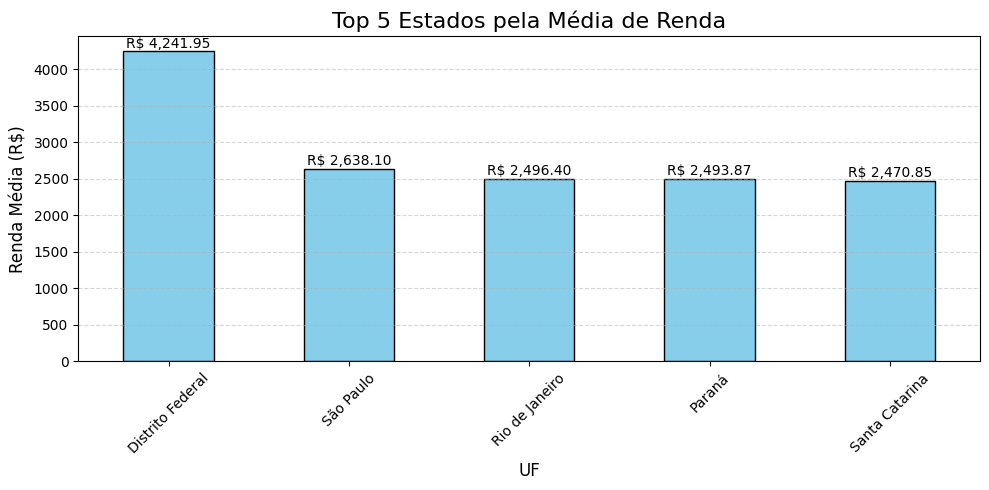

In [133]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
top_5_estados.plot(kind='bar', color='skyblue', edgecolor='black')

# Adicionando título e rótulos
plt.title('Top 5 Estados pela Média de Renda', fontsize=16)
plt.xlabel('UF', fontsize=12)
plt.ylabel('Renda Média (R$)', fontsize=12)

# Exibindo os valores no topo das barras
for i, valor in enumerate(top_5_estados):
    plt.text(i, valor + 50, f'R$ {valor:,.2f}', ha='center', fontsize=10)

# Melhorando layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

Seguindo a intrução, onde o ponto levantado foi a média dos salários por estado. Os cicadãos do Distrito Federal ganham mais que os outros estados. Mas se formos levar em consideração somente estados, pois o Distrito Federal é uma unidade federativa, a região Sudeste e Sul possuem a maior renda percapita.

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [134]:
# Filtrando apenas os estados da Região Sudeste
sudeste = dados[dados['UF'].isin(['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'])]

##### **Média**

In [135]:
# Tabela cruzada - Média
media_renda_sudeste = pd.pivot_table(
    sudeste,
    values='Renda',
    index='UF',
    columns='Sexo',
    aggfunc='mean',
    observed=False
).round(2)

print("📊 Média da Renda por UF e Sexo")
media_renda_sudeste


📊 Média da Renda por UF e Sexo


Sexo,Feminino,Masculino
UF,,
Espírito Santo,1752.71,2129.32
Minas Gerais,1489.62,2283.16
Rio de Janeiro,1971.53,2777.55
São Paulo,1950.18,2947.74


##### **Mediana**

In [136]:
mediana_renda_sudeste = pd.pivot_table(
    sudeste,
    values='Renda',
    index='UF',
    columns='Sexo',
    aggfunc='median',
    observed=False
).round(2)

print("\n📊 Mediana da Renda por UF e Sexo")
mediana_renda_sudeste



📊 Mediana da Renda por UF e Sexo


Sexo,Feminino,Masculino
UF,,
Espírito Santo,927.0,1500.0
Minas Gerais,900.0,1400.0
Rio de Janeiro,1040.5,1510.0
São Paulo,1200.0,1820.0


##### **Renda Máxima**

In [137]:
renda_maxima_sudeste = pd.pivot_table(
    sudeste,
    values='Renda',
    index='UF',
    columns='Sexo',
    aggfunc='max',
    observed=False
).round(2)

print("\n📊 Renda Máxima por UF e Sexo")
renda_maxima_sudeste



📊 Renda Máxima por UF e Sexo


Sexo,Feminino,Masculino
UF,,
Espírito Santo,100000,40000
Minas Gerais,30000,100000
Rio de Janeiro,120000,200000
São Paulo,50000,80000


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

In [138]:
# Calcular MTCs para Altura
media_altura = dados['Altura'].mean()
mediana_altura = dados['Altura'].median()
moda_altura = dados['Altura'].mode()

print(f"Média da altura: {media_altura:.2f}")
print(f"Mediana da altura: {mediana_altura:.2f}")
print(f"Moda(s) da altura:\n{moda_altura}")

Média da altura: 1.70
Mediana da altura: 1.70
Moda(s) da altura:
0    1.7
Name: Altura, dtype: float64


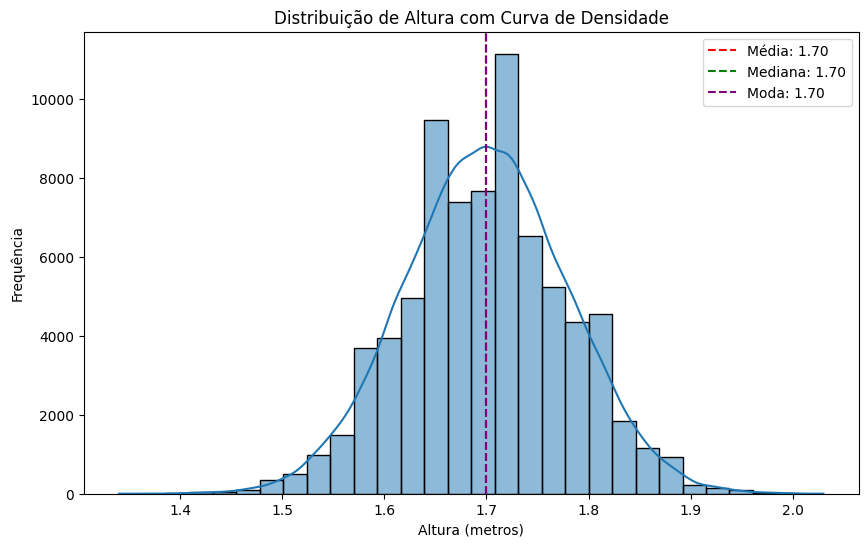

In [139]:
# Histograma com curva de densidade para Altura
plt.figure(figsize=(10, 6))
sns.histplot(dados['Altura'], kde=True, bins=30)
plt.title('Distribuição de Altura com Curva de Densidade')
plt.xlabel('Altura (metros)')
plt.ylabel('Frequência')
plt.axvline(media_altura, color='red', linestyle='--', label=f'Média: {media_altura:.2f}')
plt.axvline(mediana_altura, color='green', linestyle='--', label=f'Mediana: {mediana_altura:.2f}')
plt.axvline(moda_altura.values[0], color='purple', linestyle='--', label=f'Moda: {moda_altura.values[0]:.2f}')
plt.legend()
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

##### **Idade**

In [140]:
# Calcular MTCs para Idade
media_idade = dados['Idade'].mean()
mediana_idade = dados['Idade'].median()
moda_idade = dados['Idade'].mode()

print(f"Média da idade: {media_idade:.0f}")
print(f"Mediana da idade: {mediana_idade:.0f}")
print(f"Moda(s) da idade:\n{moda_idade}")

Média da idade: 44
Mediana da idade: 43
Moda(s) da idade:
0    40
Name: Idade, dtype: int64


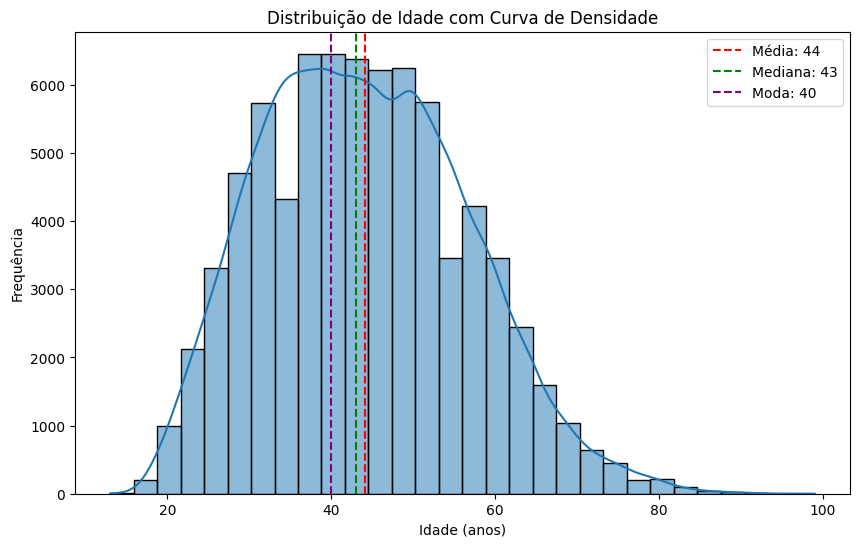

In [141]:
# Histograma com curva de densidade para Idade
plt.figure(figsize=(10, 6))
sns.histplot(dados['Idade'], kde=True, bins=30)
plt.title('Distribuição de Idade com Curva de Densidade')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência')
plt.axvline(media_idade, color='red', linestyle='--', label=f'Média: {media_idade:.0f}')
plt.axvline(mediana_idade, color='green', linestyle='--', label=f'Mediana: {mediana_idade:.0f}')
plt.axvline(moda_idade.values[0], color='purple', linestyle='--', label=f'Moda: {moda_idade.values[0]:.0f}')
plt.legend()
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [142]:
dados.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos.de.Estudo', 'Renda', 'Altura'], dtype='object')

In [143]:
# Filtrando apenas as rendas até R$15.000
rendas_ate_15000 = dados[dados['Renda'] <= 15000]['Renda']
rendas_ate_15000

,Renda
0,800
1,1150
2,880
3,3500
4,150
...,...
76835,812
76836,1500
76837,1300
76838,1500


In [144]:
# Contando o número de observações (n)
n = len(rendas_ate_15000)
n

76219

In [145]:
# Aplicando a Regra de Sturges
k = int(1 + 3.322 * np.log10(n))

print(f"Número de classes para renda até R$15.000: {k}")

Número de classes para renda até R$15.000: 17


#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



In [146]:
# Valores mínimo e máximo da amostra
min_renda = rendas_ate_15000.min()
max_renda = rendas_ate_15000.max()

In [147]:
# Ajustando o limite inferior da 1ª faixa
limite_inferior = min_renda - (max_renda - min_renda) * 0.001

# Criando os intervalos (bins)
bins = np.linspace(limite_inferior, max_renda, k + 1)

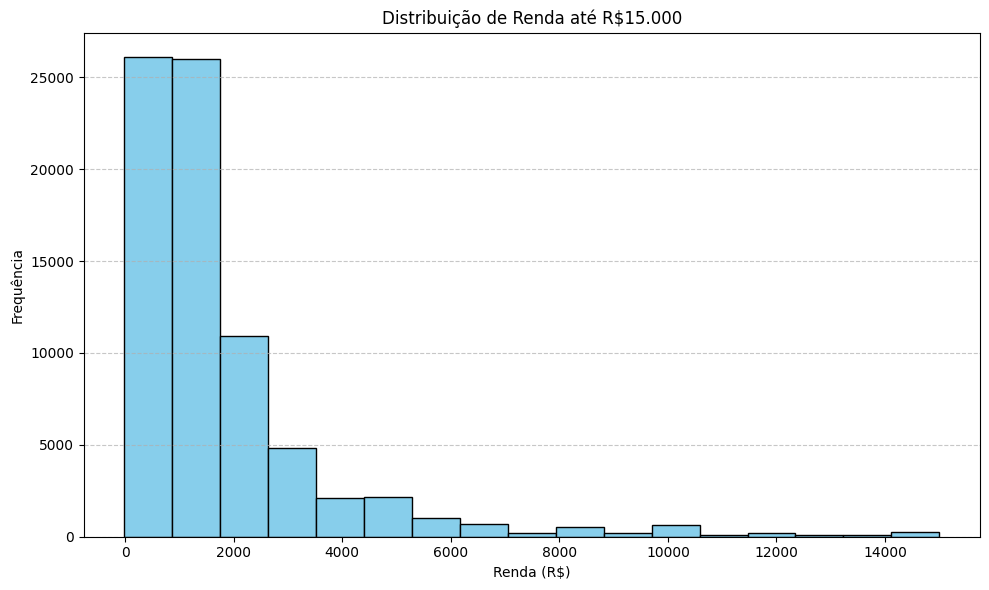

In [148]:
# Criando o histograma
plt.figure(figsize=(10,6))
plt.hist(rendas_ate_15000, bins=bins, edgecolor='black', color='skyblue')
plt.title('Distribuição de Renda até R$15.000')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [149]:
# Total de pessoas responsáveis com renda até R$788
renda_ate_788 = dados[dados['Renda'] <= 788]

# Total de pessoas com dados de Renda válidos
total_validos = dados['Renda'].notna().sum()

# Calculando o percentual
percentual = (len(renda_ate_788) / total_validos) * 100

print(f"Percentual de pessoas com renda até R$788: {percentual:.2f}%")

Percentual de pessoas com renda até R$788: 28.87%


##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [150]:
# Removendo valores ausentes na coluna Renda
renda_validas = dados['Renda'].dropna()

# Calculando o 95º percentil
renda_95 = renda_validas.quantile(0.95)

print(f"Renda máxima para 95% das pessoas: R${renda_95:.2f}")

Renda máxima para 95% das pessoas: R$6000.00


##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [151]:
# Removendo valores ausentes na coluna Renda
renda_validas = dados['Renda'].dropna()

# Calculando o 99º percentil
renda_1_porcento_top = renda_validas.quantile(0.99)

print(f"Renda mínima dos 1% mais ricos: R${renda_1_porcento_top:.2f}")


Renda mínima dos 1% mais ricos: R$15000.00


##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [152]:
# Filtrando rendas até R$6.000
renda_ate_6000 = dados[dados['Renda'] <= 6000]['Renda'].dropna()

# Calculando os percentis
q25 = renda_ate_6000.quantile(0.25)
q50 = renda_ate_6000.quantile(0.50)  # ou renda_ate_6000.median()
q75 = renda_ate_6000.quantile(0.75)

print("Resumo das rendas até R$6.000:")
print(f"Percentil 25%: R${q25:.2f}")
print(f"Mediana (50%): R${q50:.2f}")
print(f"Percentil 75%: R${q75:.2f}")

Resumo das rendas até R$6.000:
Percentil 25%: R$788.00
Mediana (50%): R$1200.00
Percentil 75%: R$2000.00


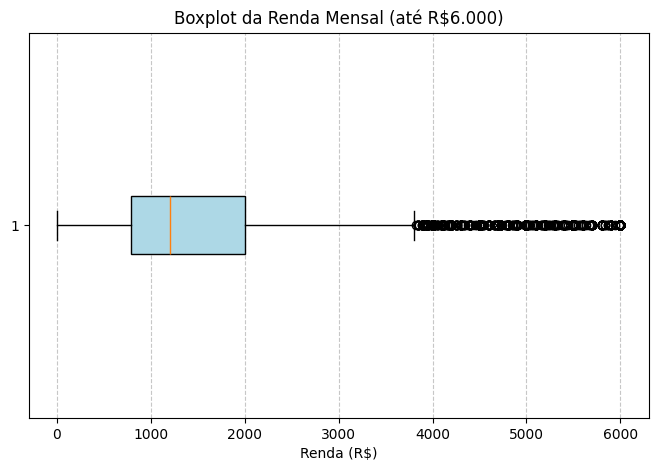

In [153]:
import matplotlib.pyplot as plt

# Criando o boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(renda_ate_6000, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot da Renda Mensal (até R$6.000)')
plt.xlabel('Renda (R$)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `hue` da seguinte maneira: `(x = Renda, y = Cat.Cor, hue = Cat.Sexo)`.

In [154]:
# Garantindo que não haja valores ausentes
dados_filtrados = dados[['Renda', 'Cor', 'Sexo']].dropna()

# Calculando o valor do 95º percentil
limite_95 = dados_filtrados['Renda'].quantile(0.95)

# Filtrando para rendas até o 95º percentil
renda_95 = dados_filtrados[dados_filtrados['Renda'] <= limite_95]


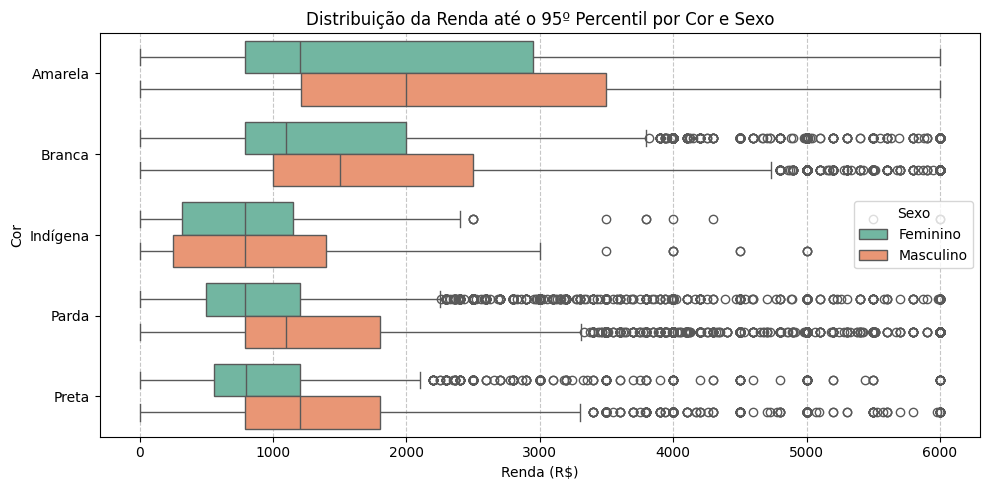

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=renda_95, x='Renda', y='Cor', hue='Sexo', palette='Set2')

plt.title('Distribuição da Renda até o 95º Percentil por Cor e Sexo')
plt.xlabel('Renda (R$)')
plt.ylabel('Cor')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

In [156]:
# Garantir que a coluna 'Idade' não tenha valores nulos
idades_validas = dados['Idade'].dropna()

# Calcular o 20º percentil (idade limite para 20% da população)
idade_20 = idades_validas.quantile(0.20)

# Número de pessoas até essa idade
total_20 = (idades_validas <= idade_20).sum()

print(f"Idade limite para os 20% mais jovens: {idade_20:.0f} anos")
print(f"Número de pessoas com até essa idade: {total_20}")


Idade limite para os 20% mais jovens: 33 anos
Número de pessoas com até essa idade: 17092


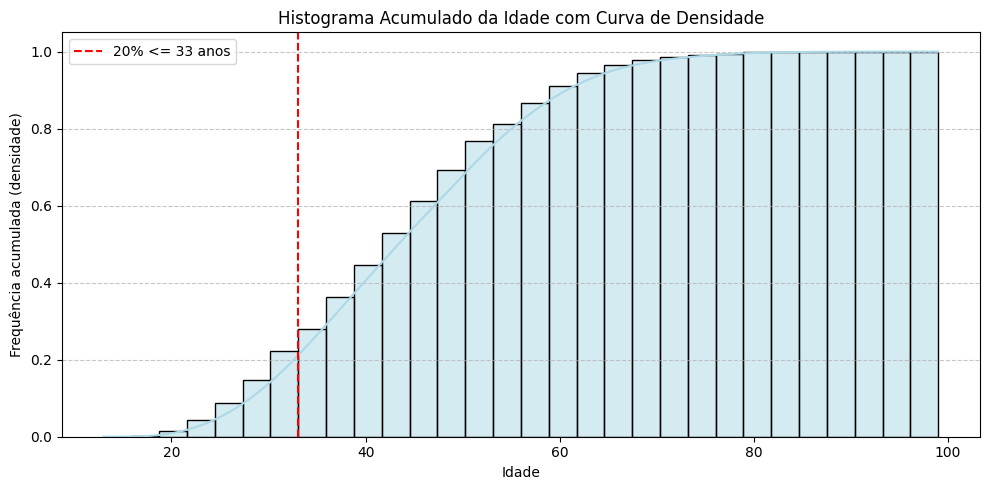

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Histograma acumulado
sns.histplot(idades_validas, bins=30, cumulative=True, kde=True, stat='density', color='lightblue', edgecolor='black')

# Linha vertical para idade limite
plt.axvline(idade_20, color='red', linestyle='--', label=f'20% <= {idade_20:.0f} anos')

plt.title('Histograma Acumulado da Idade com Curva de Densidade')
plt.xlabel('Idade')
plt.ylabel('Frequência acumulada (densidade)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [158]:
# Selecionando apenas os valores válidos de renda
rendas_validas = dados['Renda'].dropna()

# Desvio Médio Absoluto (DMA)
dma = (rendas_validas - rendas_validas.mean()).abs().mean()

# Variância
variancia = rendas_validas.var()

# Desvio Padrão
desvio_padrao = rendas_validas.std()

# Exibindo os resultados
print(f"Desvio Médio Absoluto (DMA): R${dma:.2f}")
print(f"Variância: R${variancia:.2f}")
print(f"Desvio Padrão: R${desvio_padrao:.2f}")

Desvio Médio Absoluto (DMA): R$1526.50
Variância: R$11044906.01
Desvio Padrão: R$3323.39


##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [160]:
# Remover valores ausentes nas colunas necessárias
dados_filtrados = dados[['Renda', 'Anos.de.Estudo']].dropna()

# Agrupar por Anos de Estudo e calcular estatísticas
tabela_resumo = dados_filtrados.groupby('Anos.de.Estudo')['Renda'].agg(
    Media='mean',
    Mediana='median',
    Desvio_Padrao='std'
).round(2)

# Exibir a tabela
tabela_resumo

/tmp/ipython-input-160-1005387928.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela_resumo = dados_filtrados.groupby('Anos.de.Estudo')['Renda'].agg(


,Media,Mediana,Desvio_Padrao
Anos.de.Estudo,,,
1 ano,806.52,700.0,1203.87
10 anos,1495.90,1100.0,1817.68
11 anos,1841.67,1350.0,2457.20
12 anos,2185.77,1500.0,3452.73
13 anos,2758.77,2000.0,2638.84
14 anos,3099.84,2100.0,3413.36
15 anos ou mais,5242.44,3500.0,6450.49
2 anos,842.56,788.0,1298.87
3 anos,980.04,788.0,1907.14


> #### Conclusões

Escreva suas conclusões aqui...

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [167]:
# Remover valores ausentes nas colunas relevantes
dados_filtrados = dados[['Renda', 'Sexo']].dropna()

# Filtrar para rendas até R$15.000
dados_ate_15k = dados_filtrados[dados_filtrados['Renda'] <= 15000]

# Agrupar por sexo biológico e calcular estatísticas
tabela_sexo = dados_ate_15k.groupby('Sexo')['Renda'].agg(
    Media='mean',
    Mediana='median',
    Desvio_Padrao='std'
).round(2)

# Exibir a tabela
tabela_sexo

/tmp/ipython-input-167-1591576040.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela_sexo = dados_ate_15k.groupby('Sexo')['Renda'].agg(


,Media,Mediana,Desvio_Padrao
Sexo,,,
Feminino,1460.14,900.0,1763.69
Masculino,1964.35,1300.0,2101.16


> #### Conclusões

Escreva suas conclusões aqui...

In [169]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [171]:
# Estados da Região Centro-Oeste
centro_oeste = ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul']

# Filtrar os dados válidos
dados_filtrados = dados[
    (dados['UF'].isin(centro_oeste)) &
    (dados['Renda'] <= 10000) &
    (dados['Renda'].notna()) &
    (dados['Sexo'].notna())
]

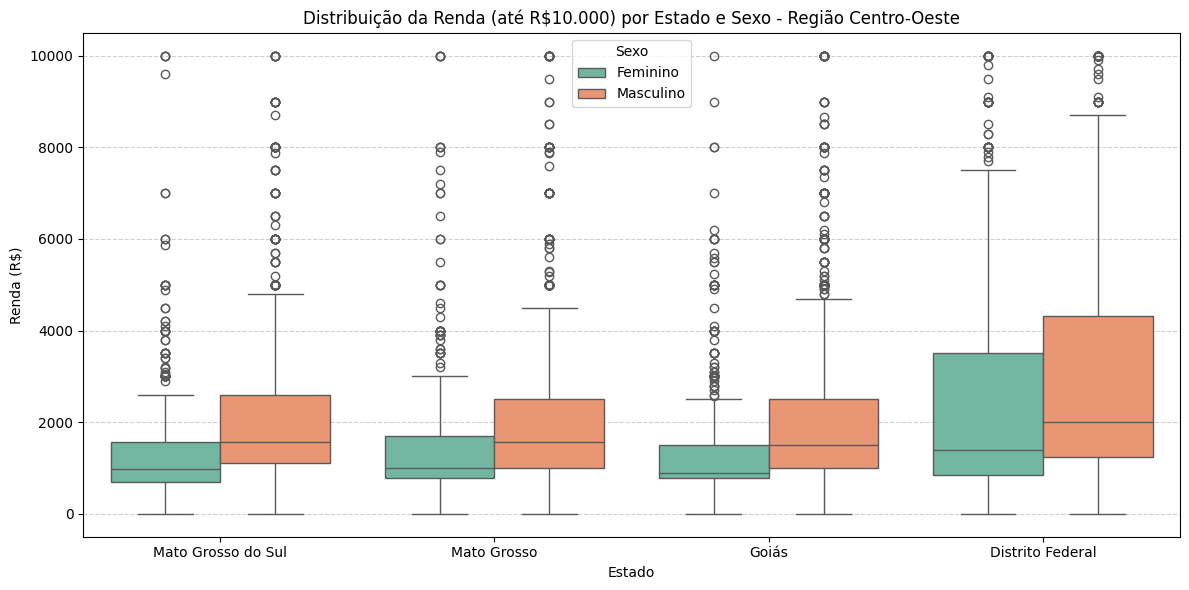

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=dados_filtrados, x='UF', y='Renda', hue='Sexo', palette='Set2')

plt.title('Distribuição da Renda (até R$10.000) por Estado e Sexo - Região Centro-Oeste')
plt.xlabel('Estado')
plt.ylabel('Renda (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

##### **Média**

In [173]:
media_renda = dados_filtrados.groupby(['UF', 'Sexo'])['Renda'].mean().unstack().round(2)
print("📌 Média da Renda:")
media_renda


📌 Média da Renda:


/tmp/ipython-input-173-2690198416.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_renda = dados_filtrados.groupby(['UF', 'Sexo'])['Renda'].mean().unstack().round(2)


Sexo,Feminino,Masculino
UF,,
Distrito Federal,2551.87,3138.46
Goiás,1284.65,2030.06
Mato Grosso,1548.93,2092.10
Mato Grosso do Sul,1396.69,2181.73


##### **Mediana**

In [174]:
mediana_renda = dados_filtrados.groupby(['UF', 'Sexo'])['Renda'].median().unstack().round(2)
print("📌 Mediana da Renda:")
mediana_renda

📌 Mediana da Renda:


/tmp/ipython-input-174-1275096362.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mediana_renda = dados_filtrados.groupby(['UF', 'Sexo'])['Renda'].median().unstack().round(2)


Sexo,Feminino,Masculino
UF,,
Distrito Federal,1400.0,2000.0
Goiás,900.0,1500.0
Mato Grosso,1000.0,1560.0
Mato Grosso do Sul,986.0,1576.0


##### **Desvio Padrão**

In [175]:
desvio_renda = dados_filtrados.groupby(['UF', 'Sexo'])['Renda'].std().unstack().round(2)
print("📌 Desvio Padrão da Renda:")
desvio_renda

📌 Desvio Padrão da Renda:


/tmp/ipython-input-175-143413557.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desvio_renda = dados_filtrados.groupby(['UF', 'Sexo'])['Renda'].std().unstack().round(2)


Sexo,Feminino,Masculino
UF,,
Distrito Federal,2451.17,2513.43
Goiás,1110.00,1587.38
Mato Grosso,1508.59,1707.91
Mato Grosso do Sul,1400.90,1773.44


> #### Conclusões

Escreva suas conclusões aqui...